In [28]:
import torch
import random
import torch.nn.functional as F

In [2]:
with open("names.txt",'r') as f:
    names = [name.strip() for name in f.readlines()]

In [3]:
names[0]

'emma'

In [5]:
a_ascii = ord('a')
stoi = {chr(i):i-a_ascii+1 for i in range(a_ascii,a_ascii+26)}
stoi['.'] = 0

In [14]:
X,y = [],[]
ctxt_len = 3
for name in names:
    ctxt = [0]*ctxt_len
    for char in name+'.':
        cn = stoi[char]
        X.append(ctxt[:])
        y.append(cn)
        ctxt.append(cn)
        ctxt = ctxt[1:]

X = torch.tensor(X)
y = torch.tensor(y)

X.shape,y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [18]:
n1 = int(0.8*len(y))
n2 = int(0.9*len(y))

X_train,y_train = X[:n1],y[:n1]
X_test,y_test = X[n1:n2],y[n1:n2]
X_val,y_val = X[n2:],y[n2:]

In [65]:
embd_size = 12
hidden_size = 400
C = torch.randn((27,embd_size))
W1 = torch.randn((3*embd_size,hidden_size))
b1 = torch.randn((hidden_size))
W2 = torch.randn((hidden_size,27))
b2 = torch.randn((27))

parameters = [C,W1,b1,W2,b2]

In [66]:
sum(p.nelement() for p in parameters)

25951

In [67]:
for p in parameters:
    p.requires_grad = True

In [68]:
stps = []
sloss = []

In [69]:
for i in range(250_000):
    ix = torch.randint(0,len(y_train),(32,))
    embd = C[X_train[ix]]
    o1 = torch.tanh(embd.view(-1,3*embd_size)@W1 + b1)
    logits = o1@W2 + b2
    loss = F.cross_entropy(logits,y_train[ix])
    if i%10000 == 0:
        print(loss.item())
    for p in parameters:
        p.grad = None
    loss.backward()

    lr = 0.1 if i < 100_000 else 0.001
    for p in parameters:
        p.data += -lr*p.grad
    
    stps.append(i)
    sloss.append(loss.log10().item())


35.38046646118164
3.728703737258911
2.8203177452087402
2.444446563720703
2.965259075164795
2.247558832168579
3.1047816276550293
2.7822654247283936
2.8439674377441406
2.180886745452881
2.1307029724121094
2.1232247352600098
1.9986649751663208
1.9484962224960327
2.1327404975891113
2.417832612991333
2.141587972640991
1.9560717344284058
2.3019468784332275
2.006502389907837
2.0751936435699463
2.3830955028533936
1.8689913749694824
2.033170461654663
2.1178722381591797


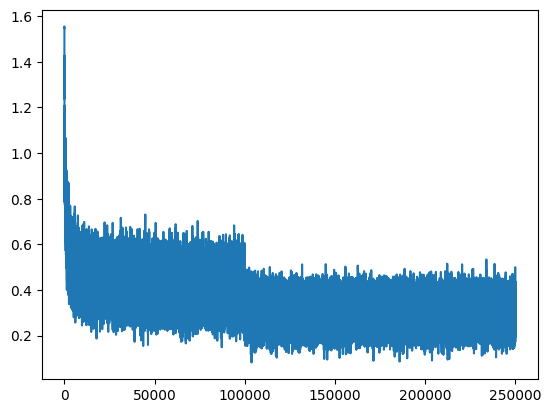

In [70]:
import matplotlib.pyplot as plt

plt.plot(stps,sloss)

In [71]:
embd = C[X_train]
o1 = torch.tanh(embd.view(-1,3*embd_size)@W1 + b1)
logits = o1@W2 + b2
F.cross_entropy(logits,y_train)

tensor(2.0426, grad_fn=<NllLossBackward0>)

In [72]:
embd = C[X_val]
o1 = torch.tanh(embd.view(-1,3*embd_size)@W1 + b1)
logits = o1@W2 + b2
F.cross_entropy(logits,y_val)

tensor(2.4820, grad_fn=<NllLossBackward0>)

In [73]:
itos = {v:k for k,v in stoi.items()}

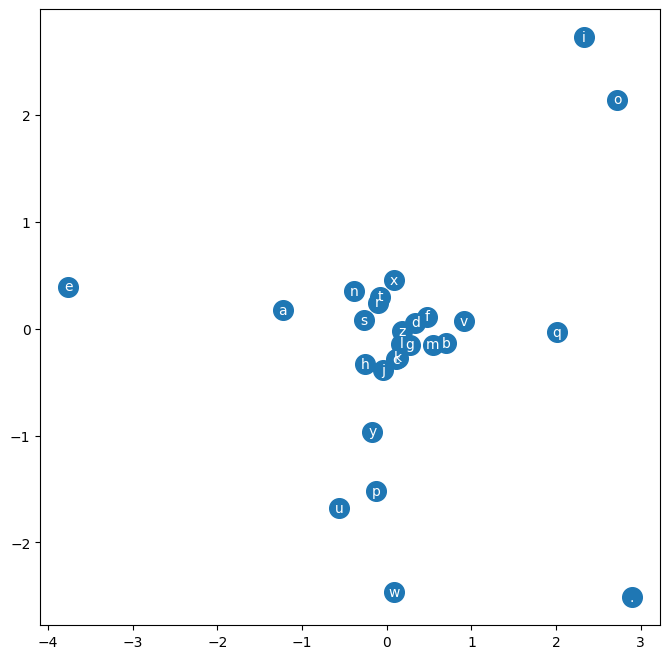

In [74]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.show()